<a href="https://colab.research.google.com/github/syejin2004/2024-1-my-BDA/blob/main/inclass/06w_0409_A_ch07_missingvalue_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **빅데이터분석프로그래밍**

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1


In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.7 MB/s eta 0:00:00


In [4]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [5]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

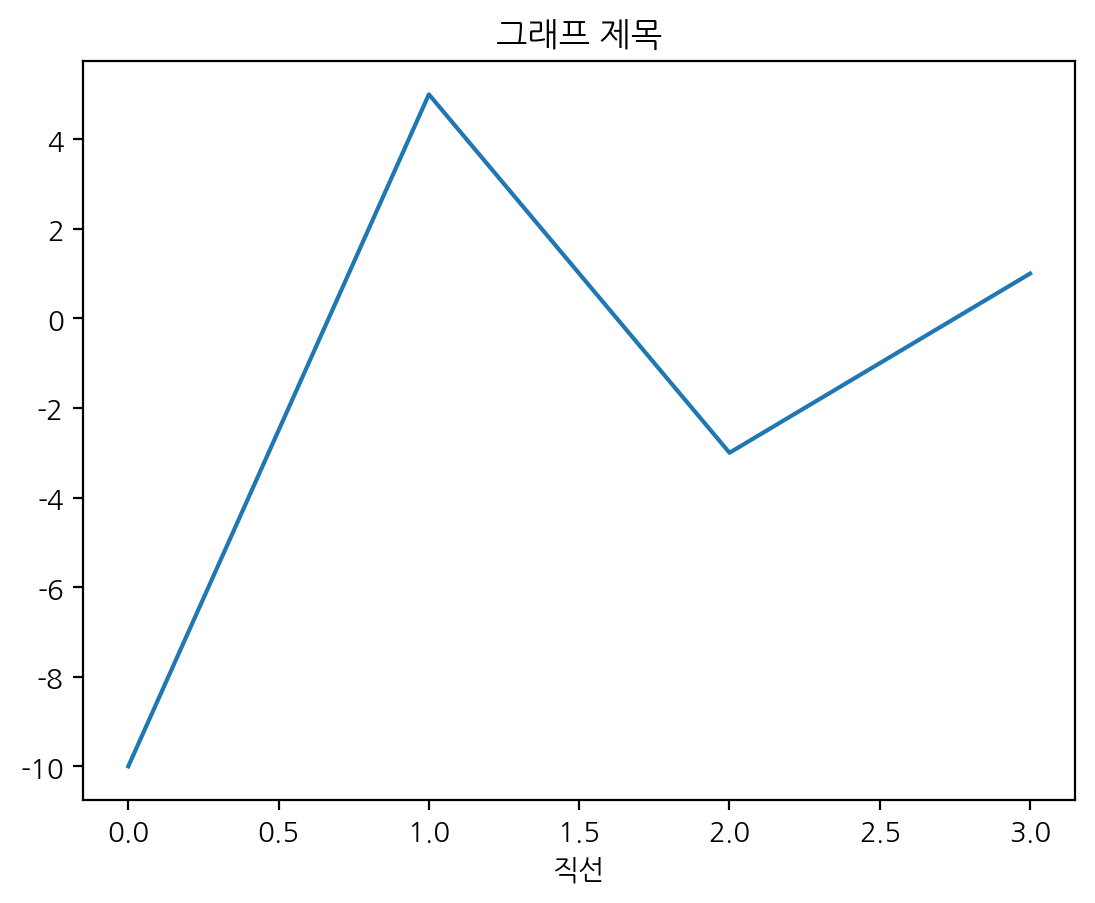

In [8]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

In [6]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 3.97 MiB/s, done.


In [7]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


## 07 데이터 정제- 빠진 데이터, 이상한 데이터 제거하기

### 결측지 찾기

#### 데이터 프레임을 주고 반대로 코드를 짜보는 문제도 나온다.

#### 빠진데이터(결측값) :  np.nan, None

In [9]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [12]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

### 결측치 확인하기 pd.isna() 시험 문제 무조건!!!!!!!!!!!!!

In [13]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [14]:
df.isna()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [17]:
df.isnull()  #결측치 확인 isna=isnull

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [18]:
df.notna()    #결측치 값이 False

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


In [19]:
df.notnull()

,sex,score
0,True,True
1,True,True
2,False,True
3,True,True
4,True,False


####  isna() = isnull()!!!!!!!!!!!!!!!!!!!
####     notna() = notnull()!!!!!!!!!!!

In [21]:
df.isna().sum()    #True=1, False=0    열로 계산

sex      1
score    1
dtype: int64

In [22]:
df.notna().sum()

sex      4
score    4
dtype: int64

In [24]:
df.isna().sum(axis=1)   #행으로 계산

0    0
1    0
2    1
3    0
4    1
dtype: int64

#### df.isna().sum(axis=0)!!!!!!!!!!!!
#### df.isna().sum(axis=1)!!!!!!!!!!!!

In [27]:
s = pd.Series([True, False, True, False])
s

0     True
1    False
2     True
3    False
dtype: bool

In [28]:
s.sum()

2

In [29]:
s.any()  #하나만 true면 true!!!!!!!

True

In [30]:
s.all()    #모두 다 true면 true!!!!!!!!

False

In [31]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [32]:
df.isna().any()

sex      True
score    True
dtype: bool

In [34]:
df.isna().any(axis=1)  #행별로 계산

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [36]:
b = df.isna().any(axis=1)
b

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [37]:
df[b]

,sex,score
2,NaN,3.0
4,F,NaN


In [40]:
df[df.isna().any(axis=1)]  #적어도 하나 이상 NaN인 행을 추출, 시험예상!!!!!!!!!!!!!!!

,sex,score
2,NaN,3.0
4,F,NaN


In [39]:
df[~df.isna().any(axis=1)]   #NaN이 하나도 없는 행을 추출, 시험예상!!!!!!!!!!!!

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [42]:
df[df.notna().all(axis=1)] #NaN이 하나도 없는 행을 추출, 시험예상!!!!!!!!!!!!

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


### 결측값 시각화



*  [패키지 missingno](https://github.com/ResidentMario/missingno)


In [47]:
df.isnull()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


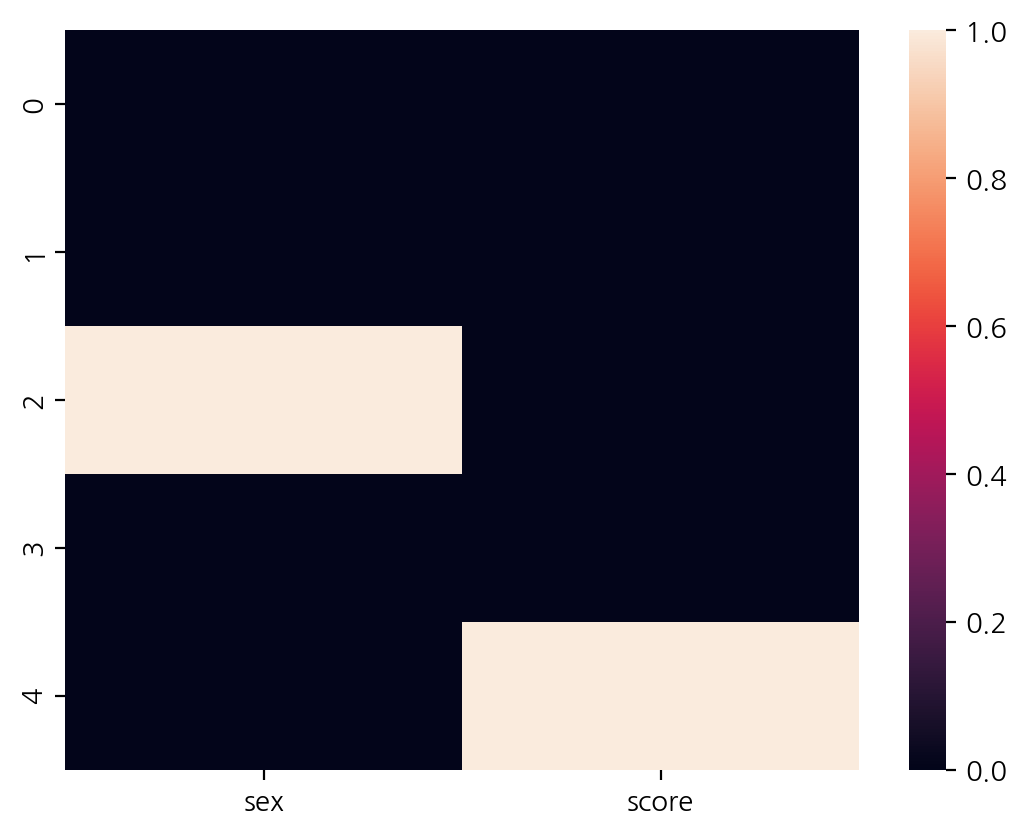

In [46]:
import seaborn as sns
sns.heatmap(df.isnull());

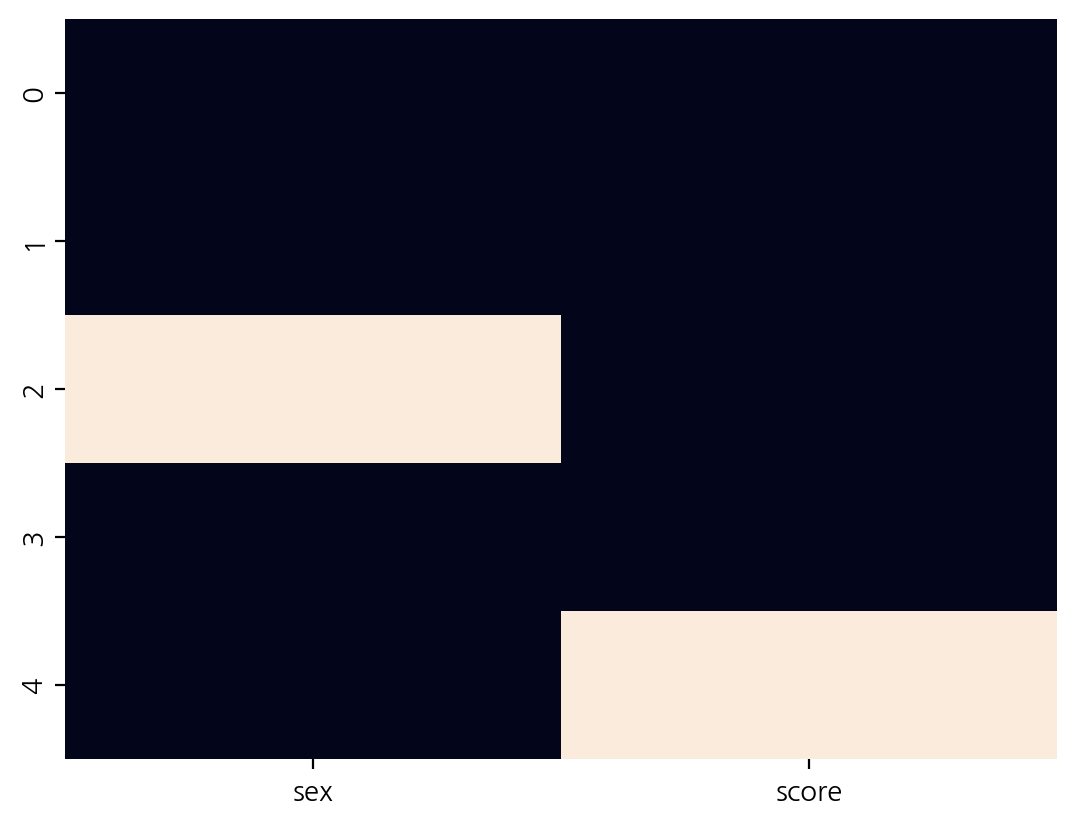

In [48]:
sns.heatmap(df.isnull(), cbar=False);

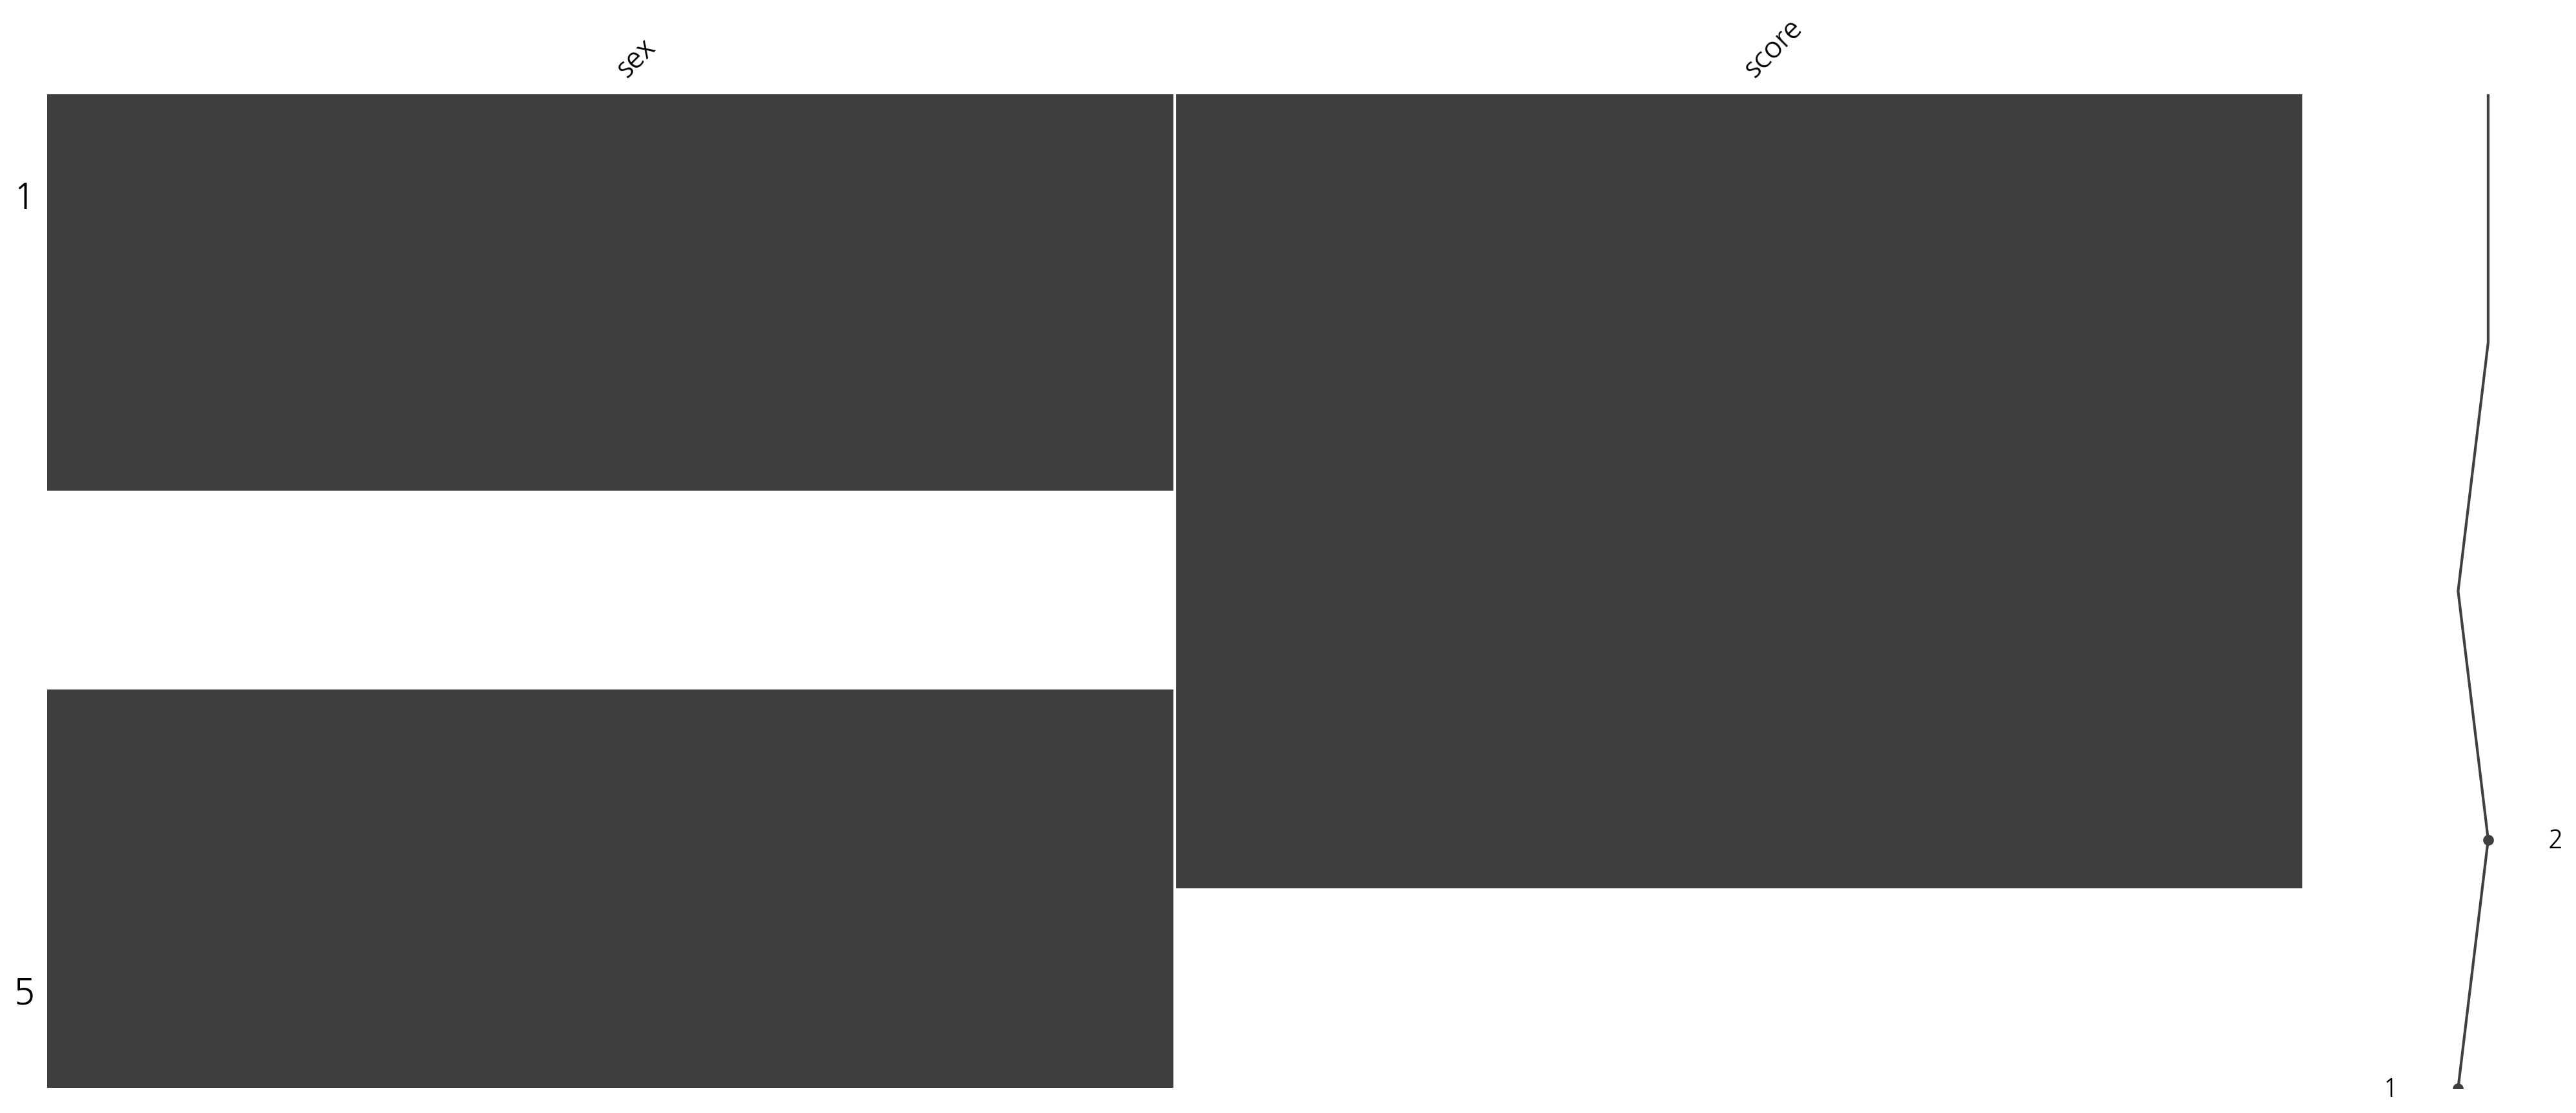

In [53]:
import missingno as msno
msno.matrix(df);

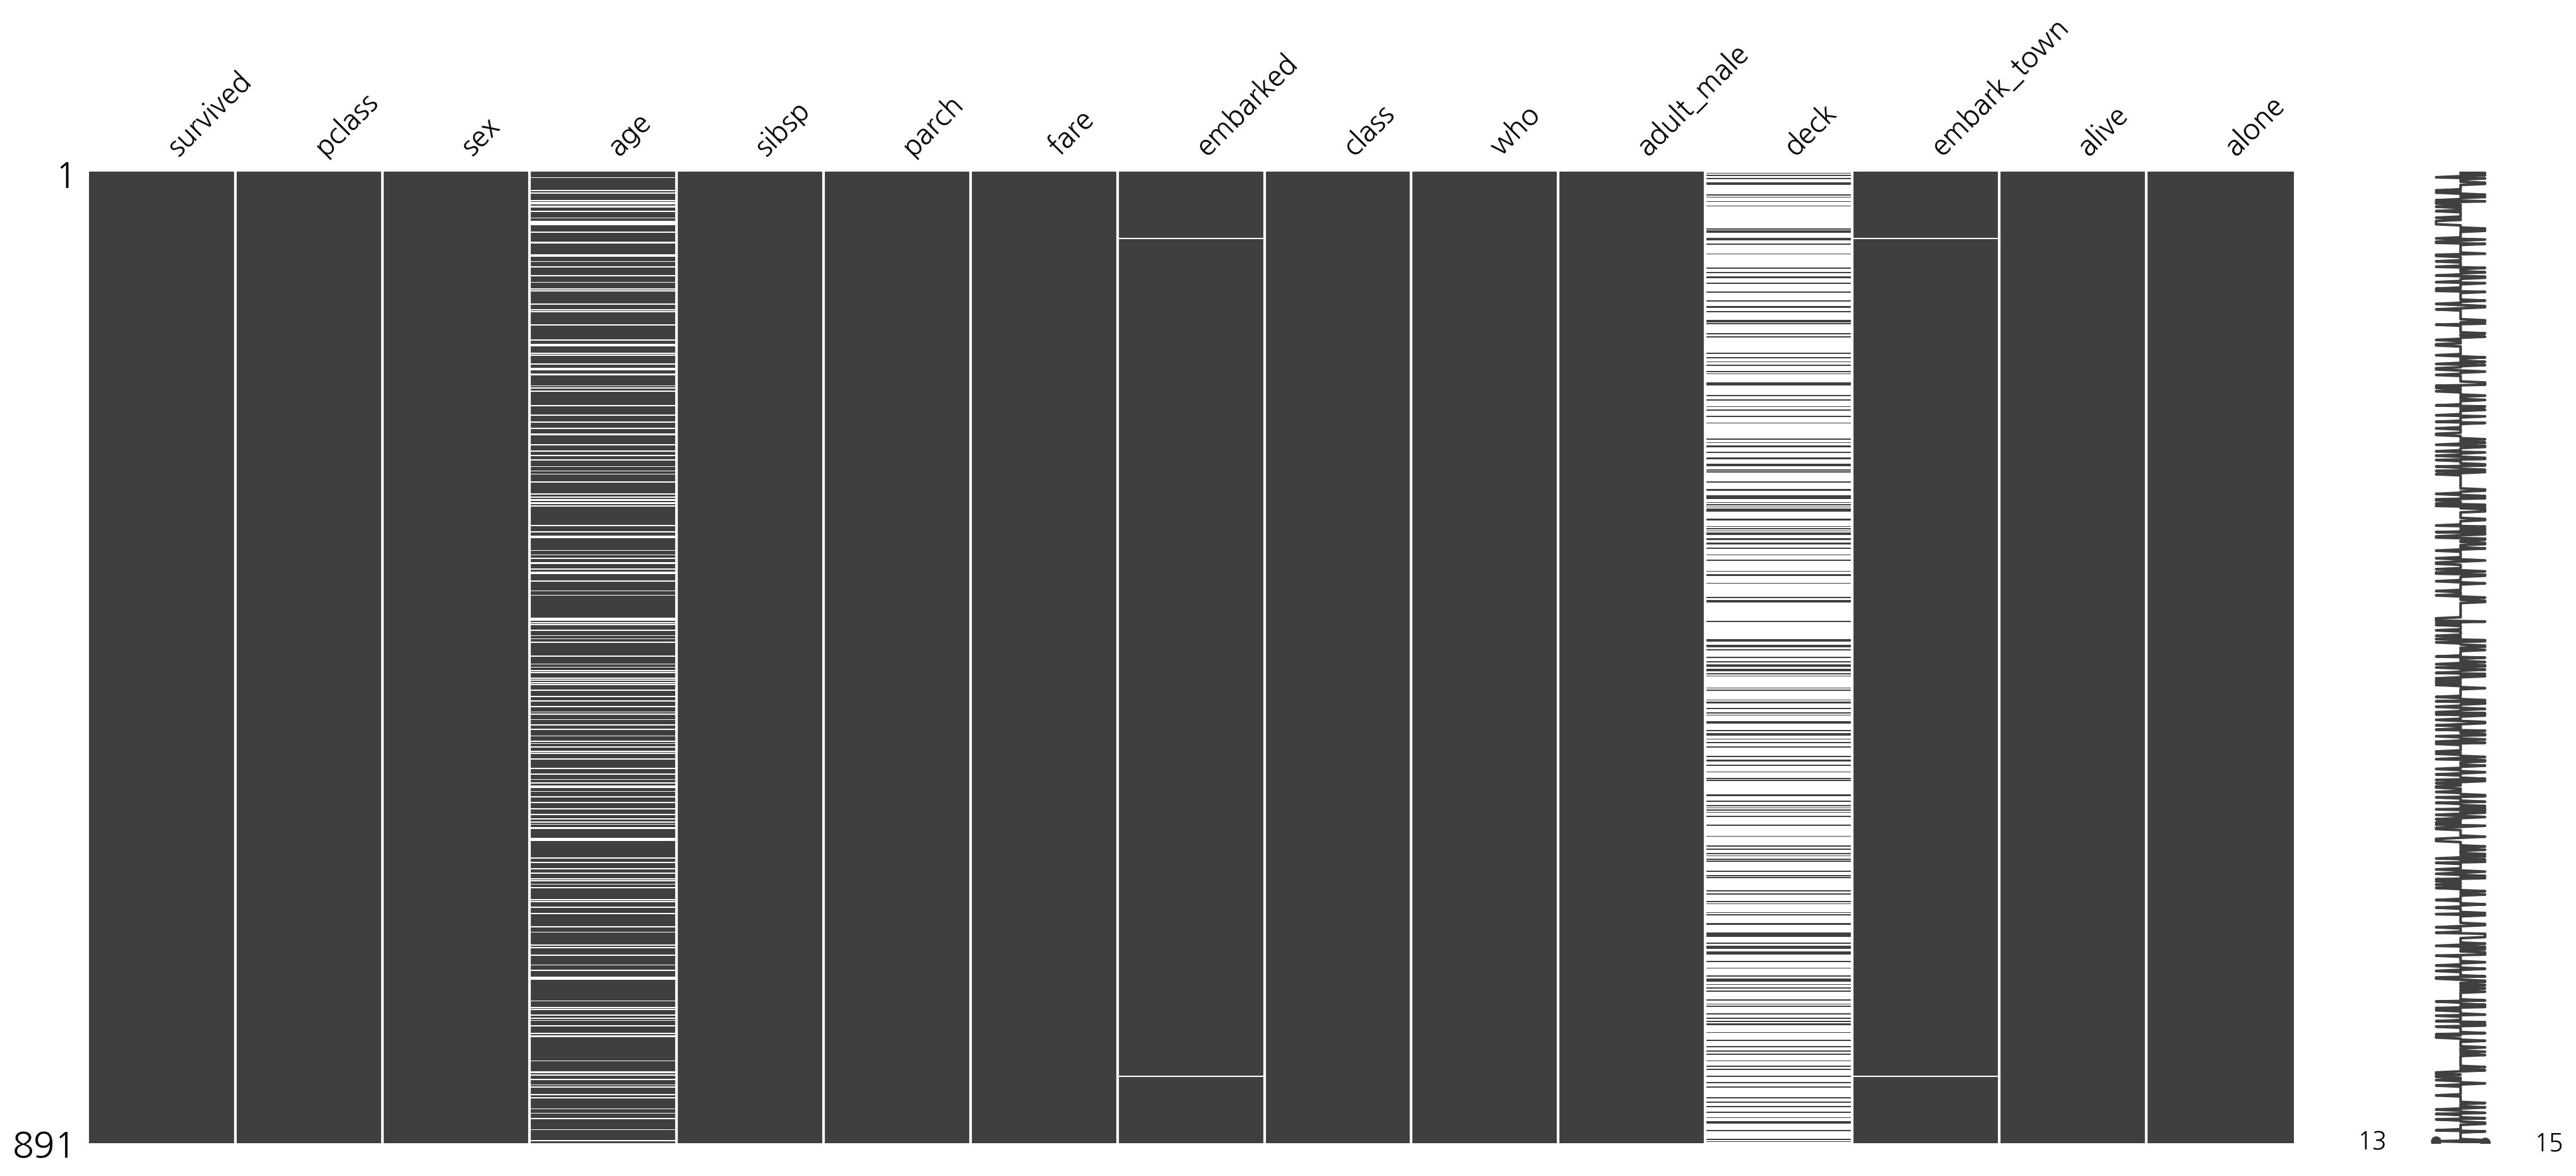

In [55]:
tdf = sns.load_dataset('titanic')
msno.matrix(tdf);

In [57]:
tdf2 = tdf.sample(20)
tdf2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
814,0,3,male,30.5,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
92,0,1,male,46.0,1,0,61.17,S,First,man,True,E,Southampton,no,False
503,0,3,female,37.0,0,0,9.59,S,Third,woman,False,NaN,Southampton,no,True
247,1,2,female,24.0,0,2,14.50,S,Second,woman,False,NaN,Southampton,yes,False
564,0,3,female,NaN,0,0,8.05,S,Third,woman,False,NaN,Southampton,no,True
537,1,1,female,30.0,0,0,106.42,C,First,woman,False,NaN,Cherbourg,yes,True
837,0,3,male,NaN,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
517,0,3,male,NaN,0,0,24.15,Q,Third,man,True,NaN,Queenstown,no,True
616,0,3,male,34.0,1,1,14.40,S,Third,man,True,NaN,Southampton,no,False
350,0,3,male,23.0,0,0,9.22,S,Third,man,True,NaN,Southampton,no,True


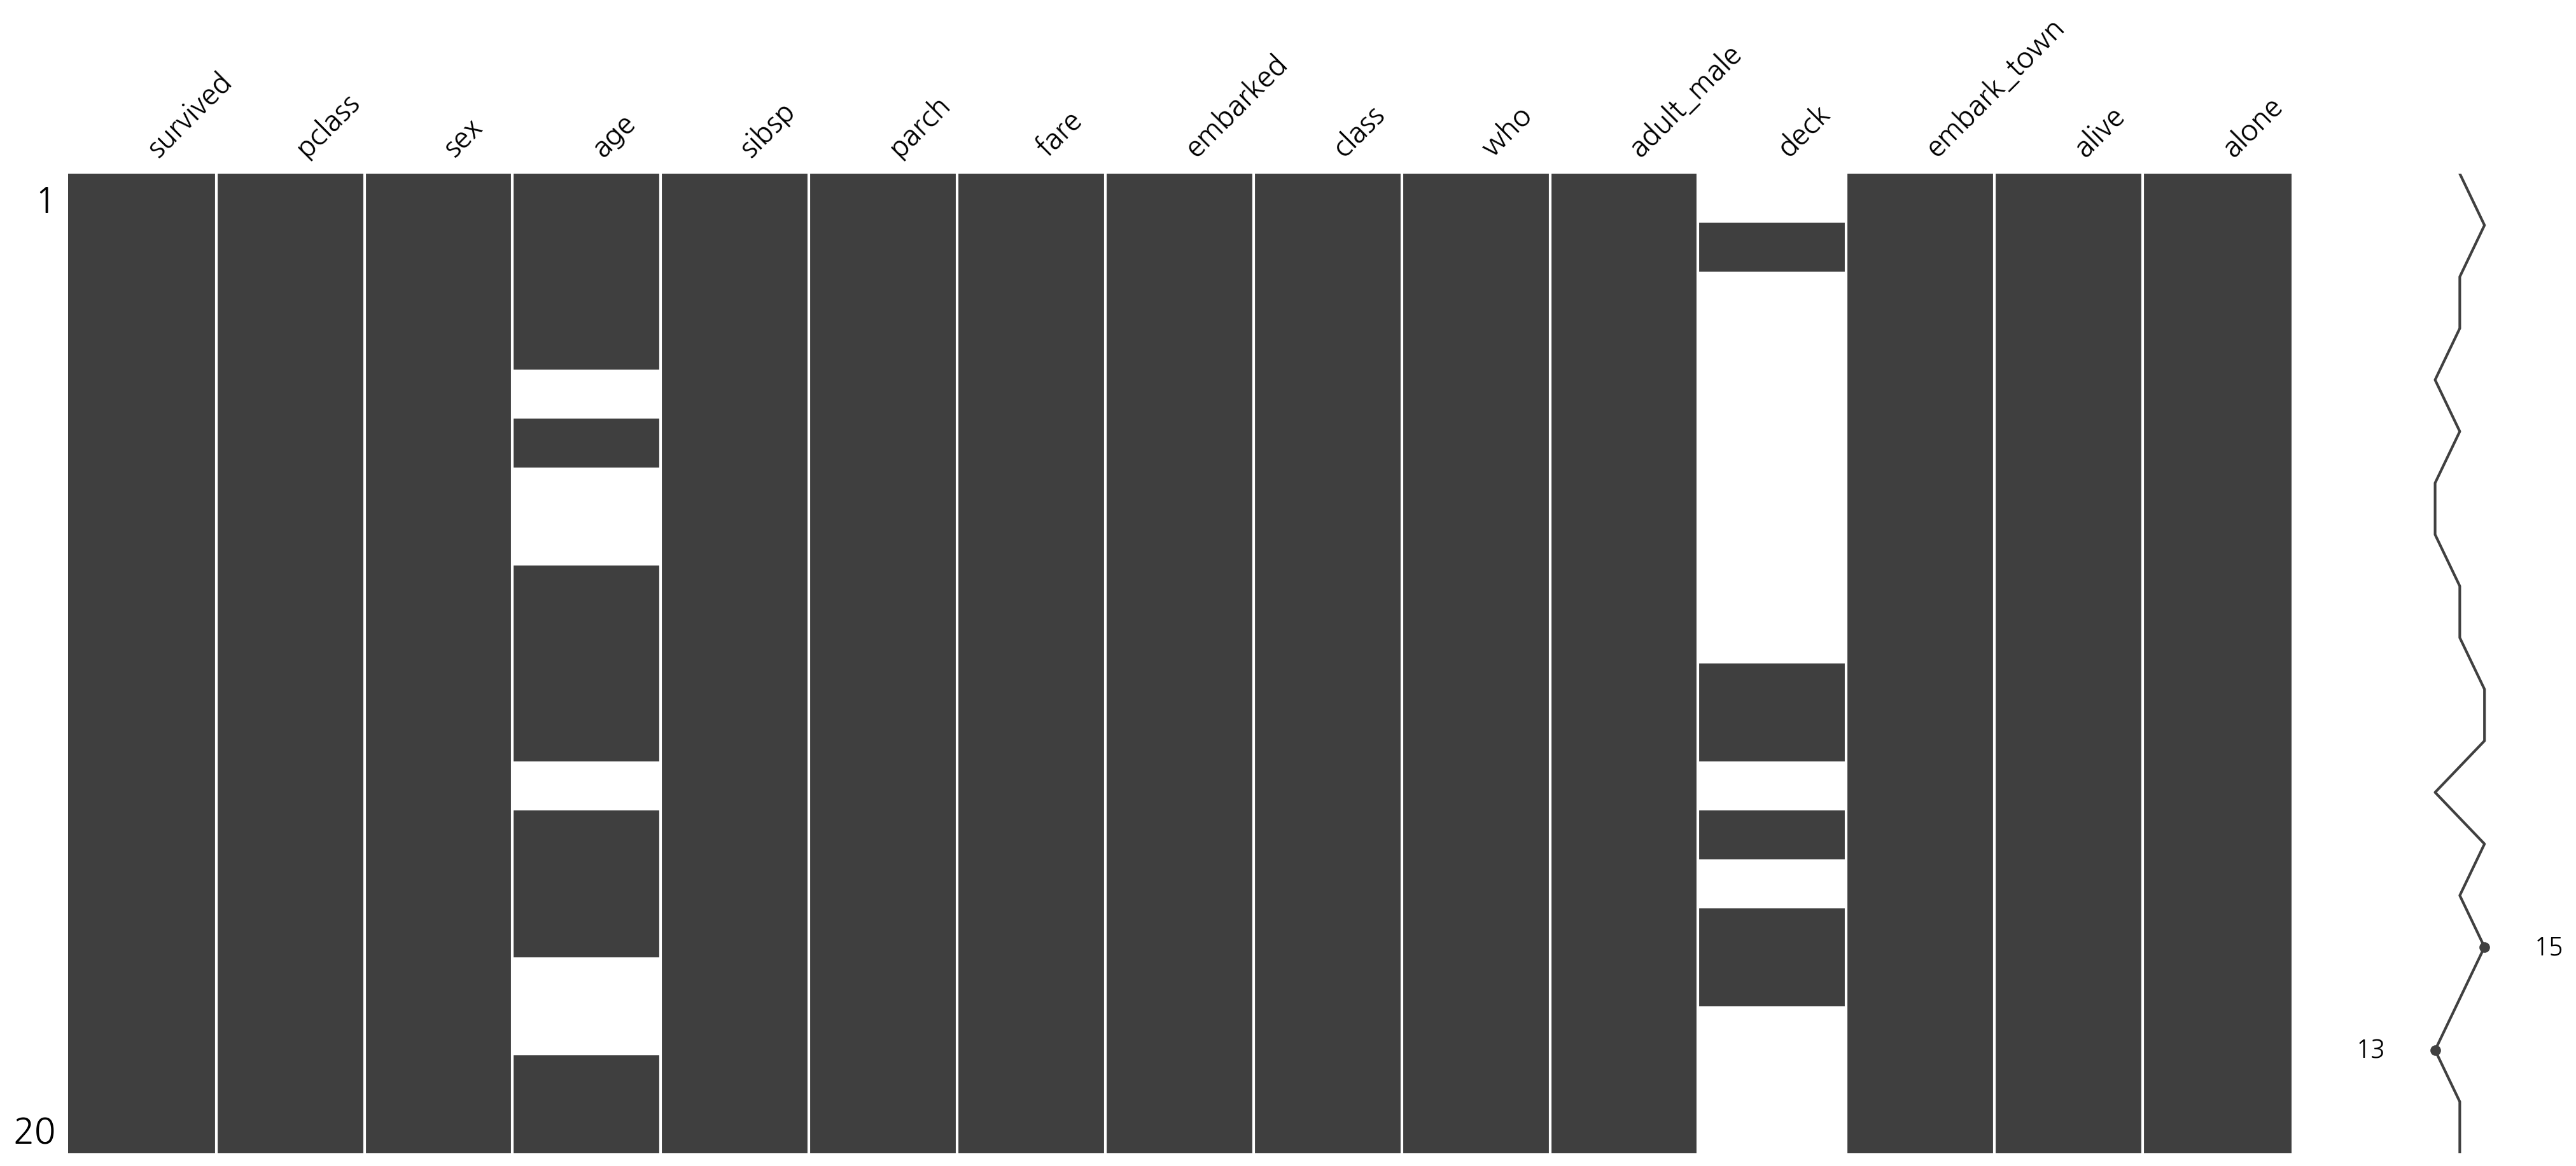

In [58]:
msno.matrix(tdf2);

- 오른쪽의 스파크라인은 데이터 완성도의 일반적인 모양을 요약하고 데이터 세트에서 최대 및 최소 널링이 있는 행을 가리킵니다.
    - 행마다 15개중 naN이 아닌 유효한 데이터의 갯수를 나타내고
    -그 점을 다음 행과 연결한 선

In [59]:
# 열 embarked이 NaN인 행 추출
tdf[ tdf.embarked.isna() ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [60]:
# 두 열, age, deck이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.46,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.00,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.22,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.22,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.88,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.23,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.50,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.90,S,Third,man,True,NaN,Southampton,no,True


In [61]:
# 세개열, age, deck, embark_town이 모두 NaN인 행 추출
tdf[(tdf.age.isna()) & (tdf.deck.isna()) & (tdf.embark_town.isna()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [62]:
 # 최소한 1개의 NaN에 있는 행 추출
 tdf[ tdf.isna( ).any(axis=1) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.46,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.07,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.05,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.12,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False


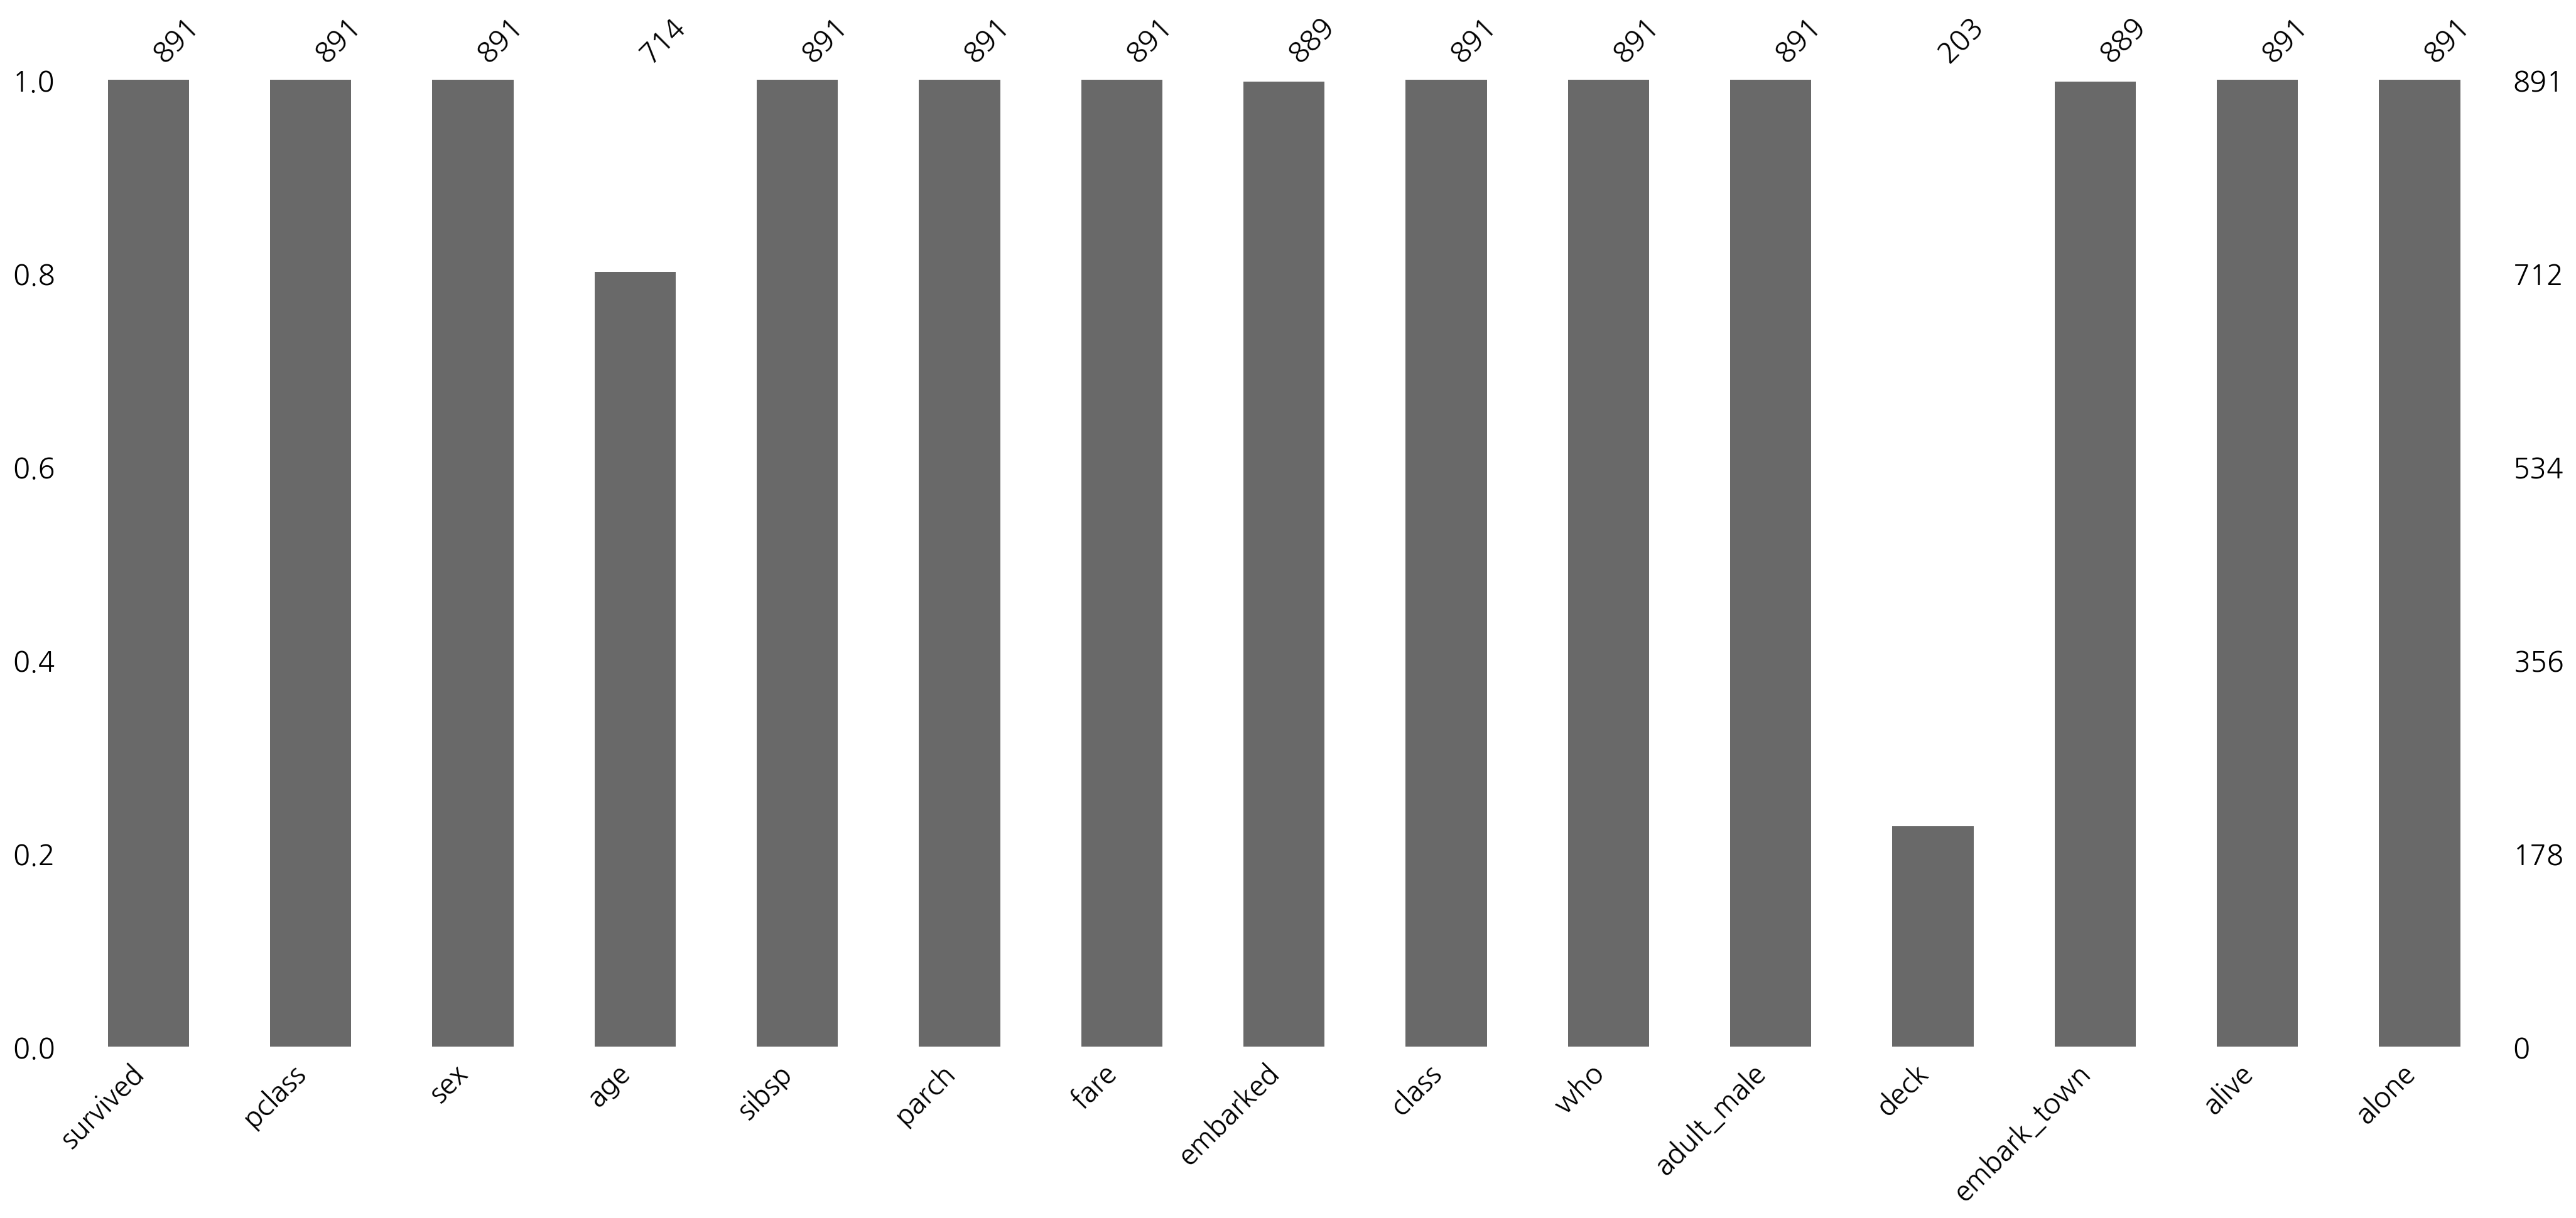

In [63]:
msno.bar(tdf);

### 결측치 제거하기

In [64]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [65]:
df.dropna()   #NaN 제거

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0




*   subset : 열 레이블 또는 레이블 시퀀스(선택 사항)
*    예를 들어 행을 드롭하는 경우, 다른 축인 열을 지정하면 그열에 null이 있는 행을 제거



In [67]:
df.dropna(subset = ['score'])  #score에 null이 있으면 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [68]:
df.dropna(subset = ['sex'])  #sex에 null이 있으면 제거

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0
4,F,NaN


In [72]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [73]:
df_nomiss['score']+1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [74]:
df.dropna(subset = ['sex'], axis=0)

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0
4,F,NaN


In [78]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [77]:
# 행 2에 NaN이 있으면 열을 제거
df.dropna(subset = [2], axis=1)

,score
0,5.0
1,4.0
2,3.0
3,4.0
4,NaN


In [79]:
# 행 3에 NaN이 있으면 열을 제거
df.dropna(subset = [3], axis=1)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [80]:
# 행 4에 NaN이 있으면 열을 제거
df.dropna(subset = [4], axis=1)

,sex
0,M
1,F
2,NaN
3,M
4,F


In [81]:
df.dropna(axis=1)

""
0
1
2
3
4


In [82]:
df.dropna(axis=1).empty

True

In [83]:
df['score'].mean()  #결측값은 제거(무시)하고 계산

4.0

In [84]:
df['score'].sum()

16.0

In [85]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


### pandas 문서

In [86]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman', np.NaN],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip', np.nan],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT, pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT
3,NaN,NaN,NaT


In [87]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True
3,True,True,True


In [88]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [89]:
df.dropna(axis=1) # axis = 'columns'

""
0
1
2
3


In [92]:
#하나라도 NaN인 경우, 행 제거
df.dropna(how = 'any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [93]:
#모든 값이 NaN인 경우, 행 제거
df.dropna(how = 'all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


### 결측치 대체하기

#### 평균값으로 결측치 대체하기

In [94]:
exam = pd.read_csv('data/exam.csv')      # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [95]:
exam.loc[[2, 7, 14], ['math']]  #dataframe

,math
2,NaN
7,NaN
14,NaN


In [97]:
exam.loc[[2, 7, 14], 'math']  #series

2    NaN
7    NaN
14   NaN
Name: math, dtype: float64

In [99]:
exam.math.mean()

55.23529411764706

### 결측값 채워넣기 fillna()

In [100]:
exam['math'] = exam['math'].fillna(100)  # math가 NaN이면 100으로 대체
exam                                    # 출력

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,100.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,100.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [101]:
exam = pd.read_csv('data/exam.csv')      # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [102]:
pd.set_option('display.precision', 3)  #소수점 3번째자리까지 표시

m = exam['math'].mean()
exam['math'] = exam['math'].fillna(m)  # math가 NaN이면 55.23529411764706로 대체
exam

,id,nclass,math,english,science
0,1,1,50.000,98,50
1,2,1,60.000,97,60
2,3,1,55.235,86,78
3,4,1,30.000,98,58
4,5,2,25.000,80,65
5,6,2,50.000,89,98
6,7,2,80.000,90,45
7,8,2,55.235,78,25
8,9,3,20.000,98,15
9,10,3,50.000,98,45


### 07-2 이상한 데이터를 찾아라 - 이상치 정제하기

In [103]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [105]:
df['sex'].value_counts()

sex
1.0    3
2.0    2
Name: count, dtype: int64

In [106]:

df['score'].value_counts()

score
4    2
5    1
3    1
2    1
6    1
Name: count, dtype: int64

In [107]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [108]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [109]:
# sex, score 결측치 제거, sex별 분리, score 평균구하기
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [110]:
df.dropna().groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [111]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)  # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [112]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [116]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [117]:
# 'etc'를 NaN으로 바꾸기
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [118]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


### 이상치 제거하기 - 극단적인 값

In [121]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
171,subaru,impreza awd,2.5,2008,4,manual(m5),4,19,25,p,compact
145,nissan,altima,3.5,2008,6,manual(m6),f,19,27,p,midsize
158,pontiac,grand prix,5.3,2008,8,auto(s4),f,16,25,p,midsize
223,volkswagen,new beetle,2.0,1999,4,manual(m5),f,21,29,r,subcompact
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact


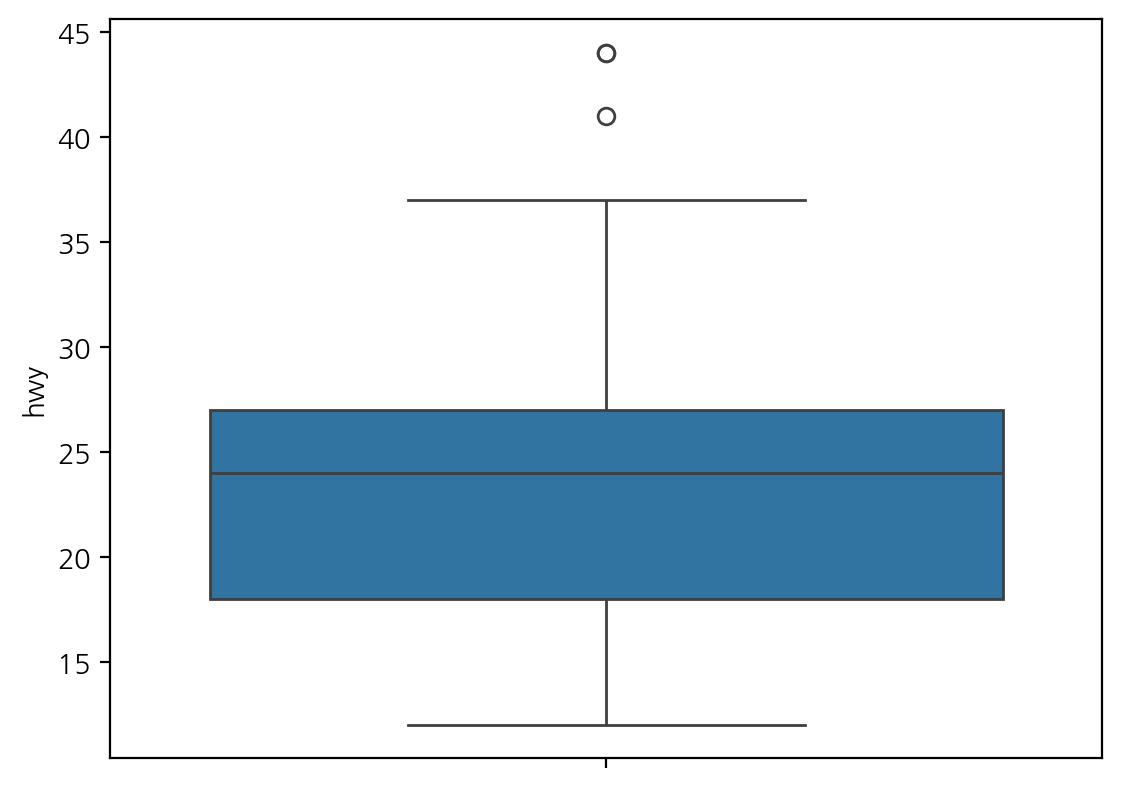

In [122]:
import seaborn as sns
sns.boxplot(mpg, y = 'hwy');

In [124]:
mpg.hwy.describe()

count    234.000
mean      23.440
std        5.955
min       12.000
25%       18.000
50%       24.000
75%       27.000
max       44.000
Name: hwy, dtype: float64

In [125]:
s = pd.Series([1, 2, 3, 4, 5])

In [126]:
s.quantile([.25, .50, .75])

0.25    2.0
0.50    3.0
0.75    4.0
dtype: float64

In [127]:
s2 = pd.Series([1, 2, 4, 5])

In [128]:
s2.quantile([.25, .50, .75])

0.25    1.75
0.50    3.00
0.75    4.25
dtype: float64

In [129]:
pct25, pct75 = mpg['hwy'].quantile([.25, .75])

In [130]:
pct25

18.0

In [131]:
pct75

27.0

#### IQR(interquartile range) 구하기

In [132]:
iqr = pct75 - pct25
iqr

9.0

#### 하한, 상한 구하기

In [133]:
pct25 - 1.5 * iqr  # 하한

4.5

In [134]:
pct75 + 1.5 * iqr  # 상한

40.5

In [135]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

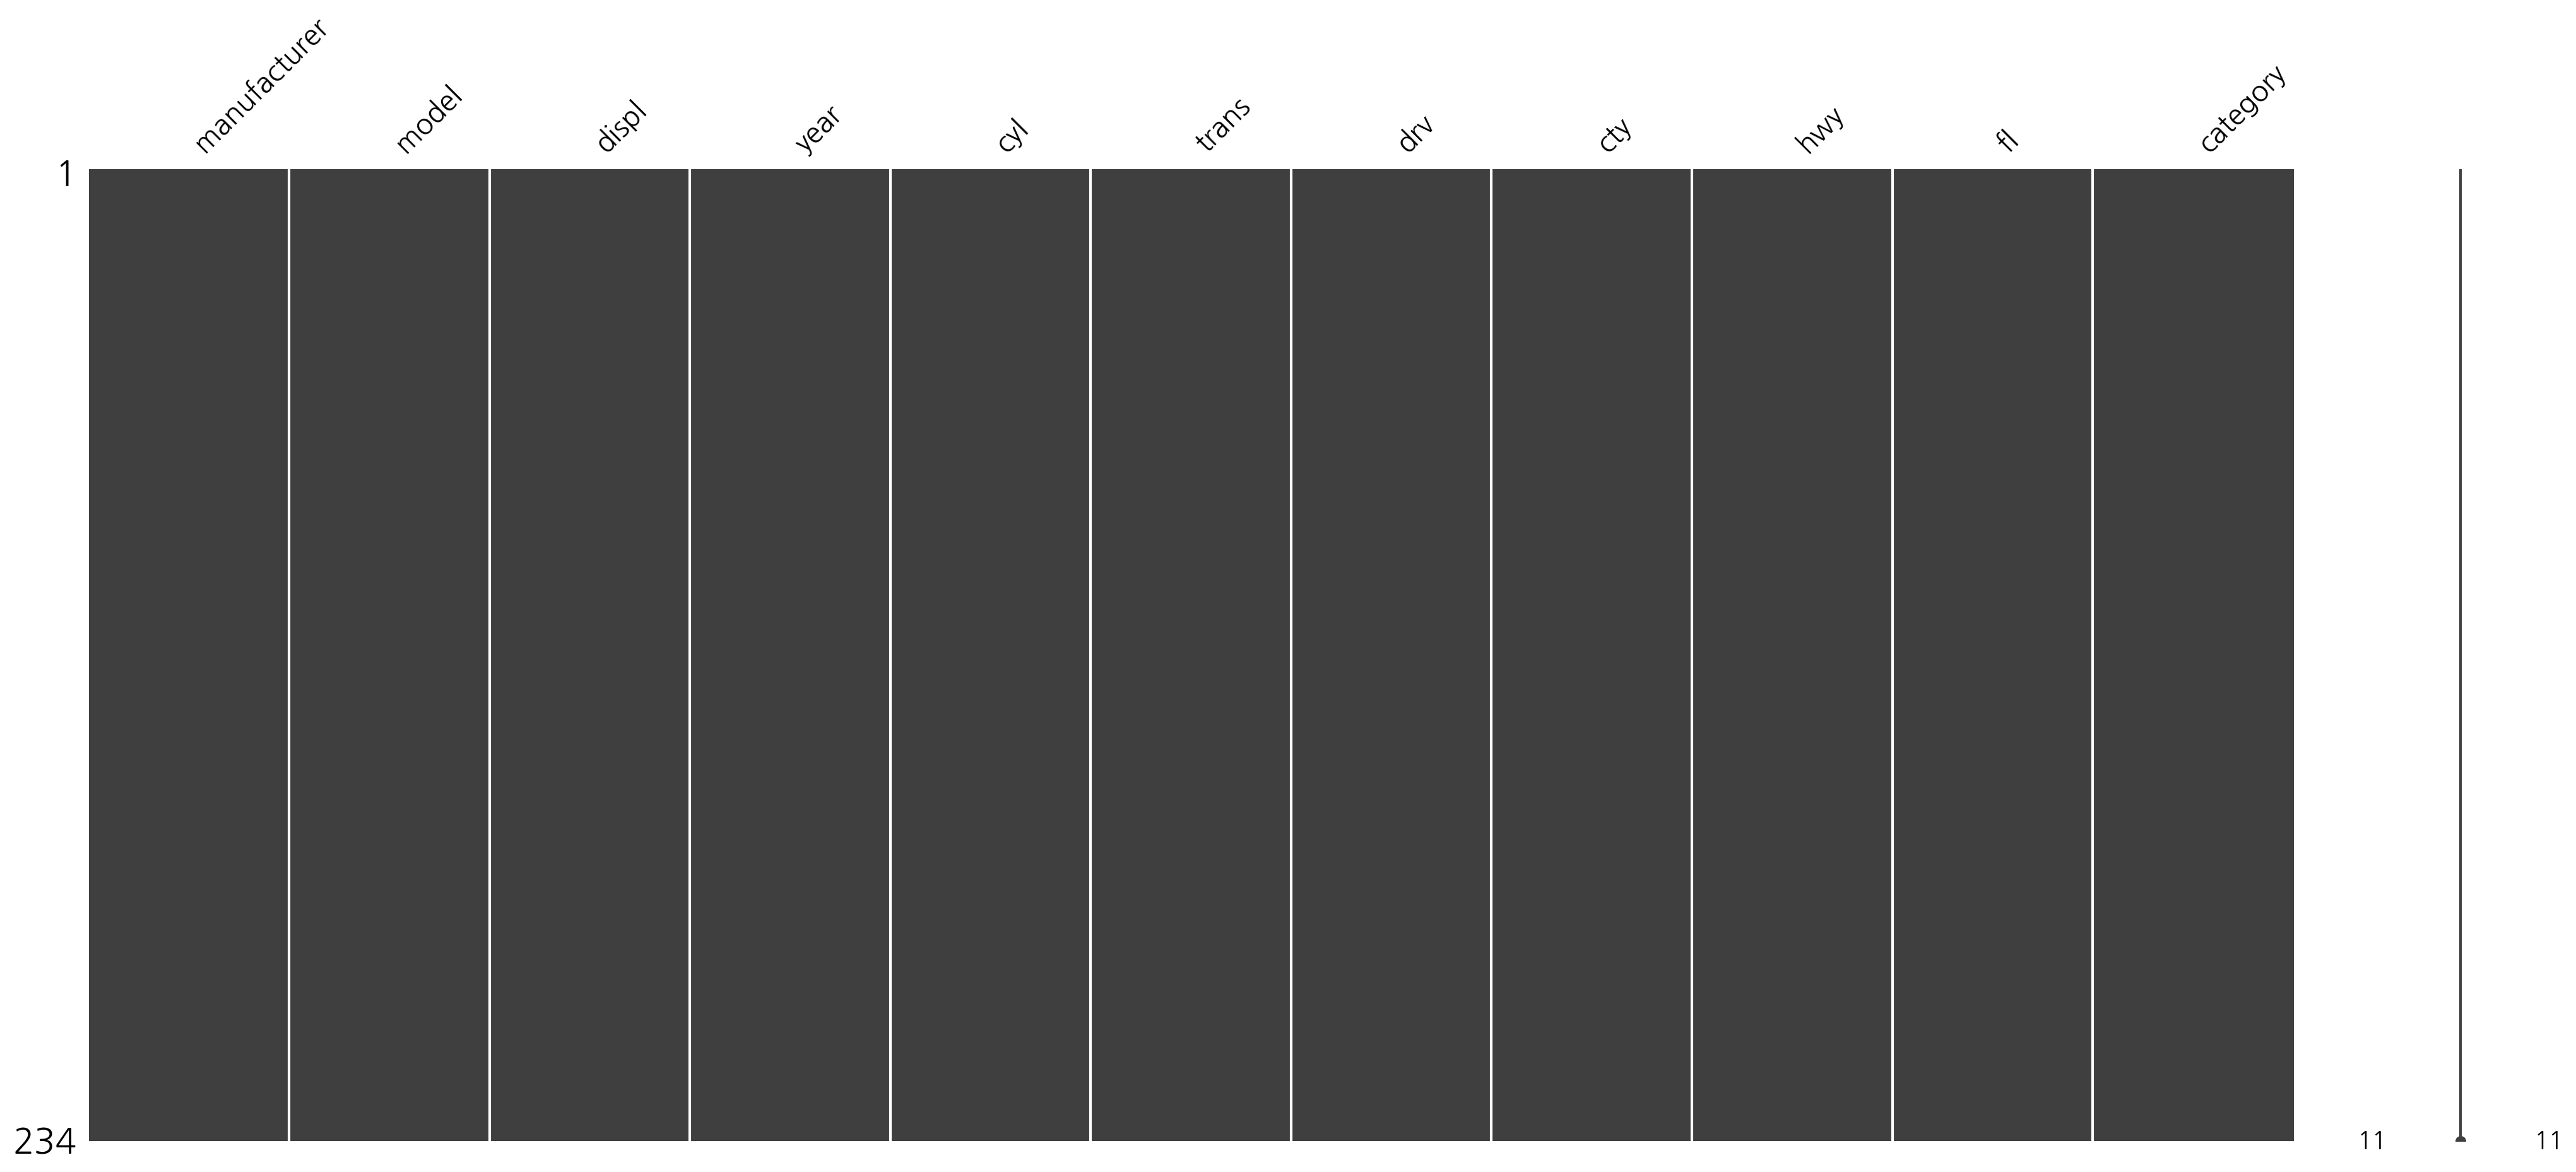

In [137]:
import missingno as msno
msno.matrix(mpg);

In [138]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg)

234

In [145]:
dmpg.shape[1]

11

#### 3.이상값을 결측 처리하기

In [139]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')

In [140]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [146]:
dmpg.shape

(234, 11)

In [148]:
dmpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.175
f,28.160
r,21.000


In [149]:
mpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.175
f,27.728
r,21.000


In [147]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.175
f,28.160
r,21.000


In [143]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.175
f,27.728
r,21.000


## 정리하기

In [120]:
## 1. 결측치 정제하기
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
pd.isna(df).sum()                                 # 결측치 확인
df_nomiss = df.dropna(subset = ['score'])         # 결측치 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])  # 여러 변수 동시에 결측치 제거


## 2. 이상치 정제하기

# 이상치 확인
df['sex'].value_counts(sort = False)

# 이상치 결측 처리
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

# 상자 그림으로 극단치 기준값 찾기
pct25 = mpg['hwy'].quantile(.25)  # 1사분위수
pct75 = mpg['hwy'].quantile(.75)  # 3사분위수
iqr = pct75 - pct25               # IQR
pct25 - 1.5 * iqr                 # 하한
pct75 + 1.5 * iqr                 # 상한

# 극단치 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])